# EDA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
df = pd.read_csv('drive/MyDrive/DataMining/transaction_dataset.csv')
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/DataMining/transaction_dataset.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

EDA

In [ ]:
print(df.shape)
df.head()

(9841, 51)


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
# Ommit first two columns (Index, Adress)
df = df.iloc[:,2:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [ ]:
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


In [ ]:
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

The categorical column --Address-- has --9816-- unique values
The categorical column -- ERC20 most sent token type-- has --304-- unique values
The categorical column -- ERC20_most_rec_token_type-- has --466-- unique values


In [ ]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [ ]:
df[numericals].std()

,0
FLAG,4.152241e-01
Avg min between sent tnx,2.148655e+04
Avg min between received tnx,2.308171e+04
Time Diff between first and last (Mins),3.229379e+05
Sent tnx,7.572264e+02
Received Tnx,9.408366e+02
Number of Created Contracts,1.414456e+02
Unique Received From Addresses,2.986211e+02
Unique Sent To Addresses,2.638204e+02
min value received,3.259291e+02


FLAG
0    7662
1    2179
Name: count, dtype: int64


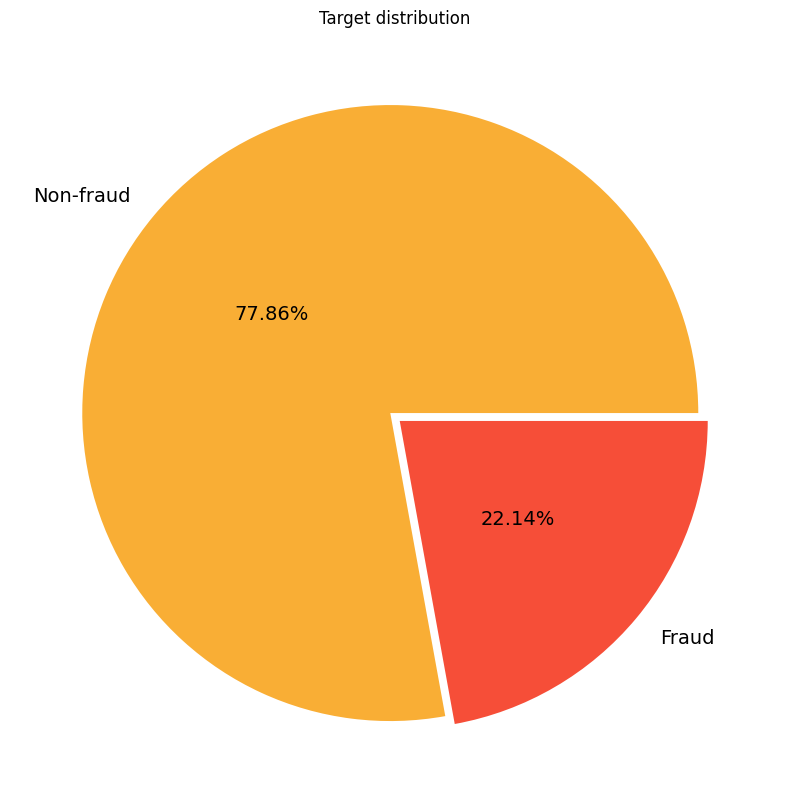

In [ ]:
import matplotlib.pyplot as plt
print(df['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

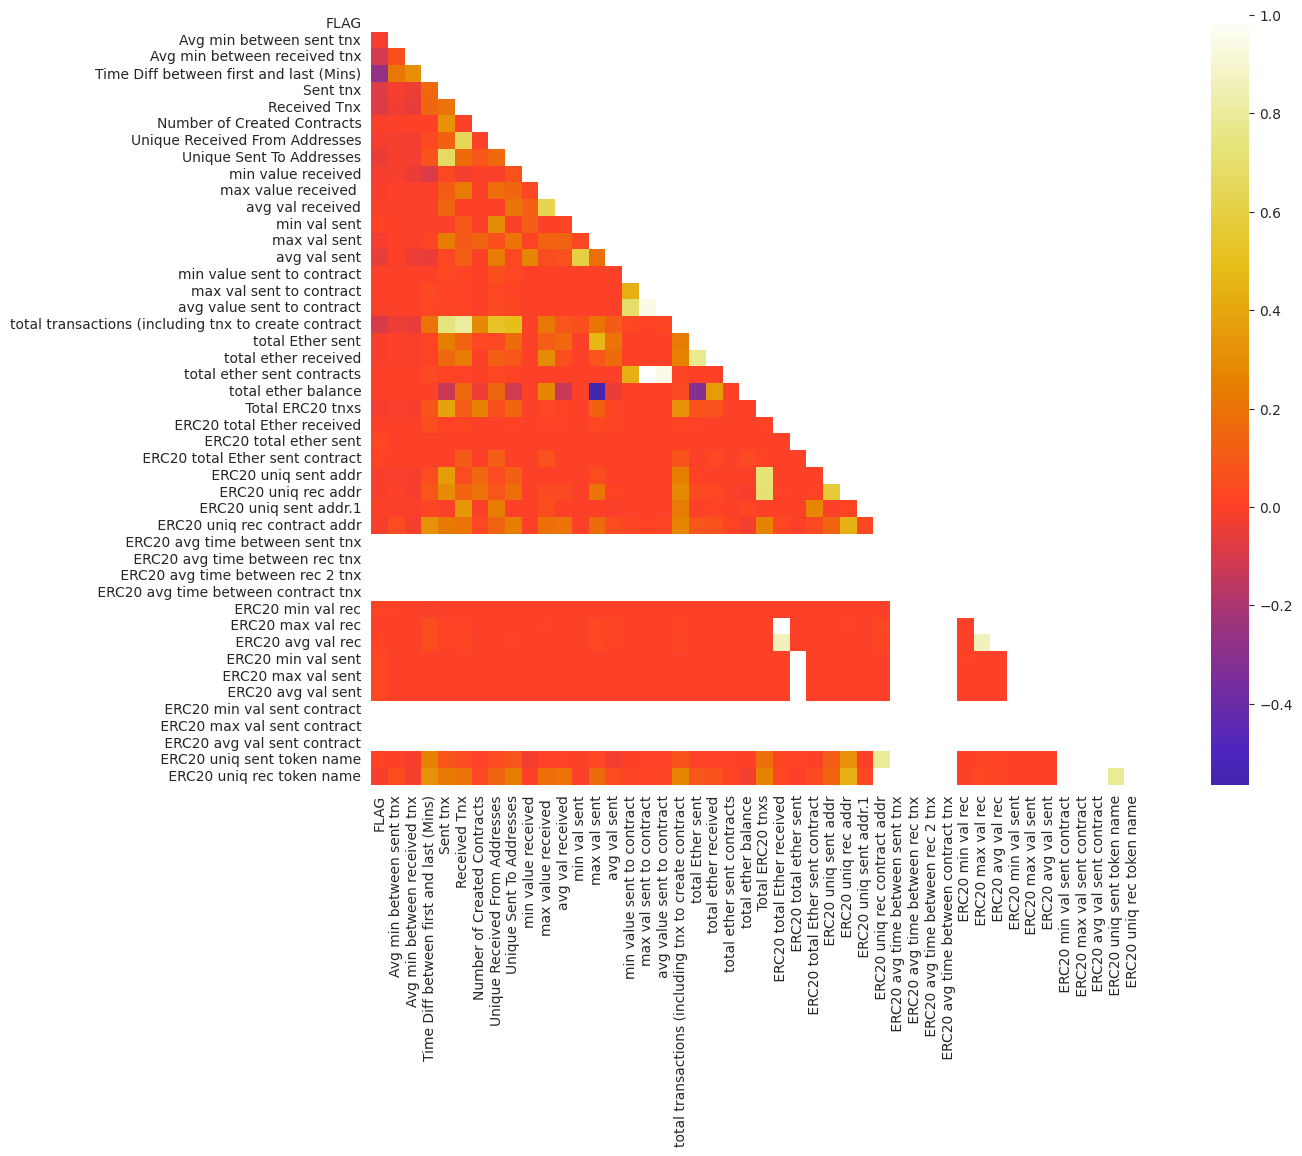

In [ ]:
# Correlation matrix
corr = df.select_dtypes(include=['float','int']).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

# Data Cleaning

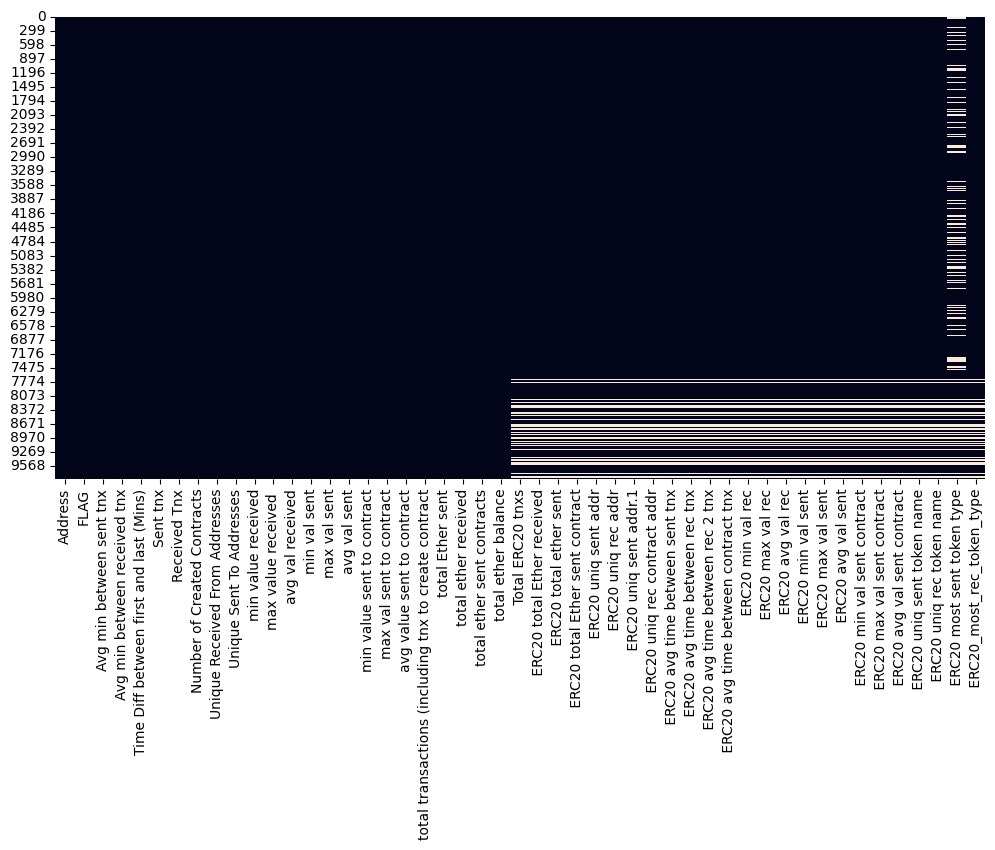

In [ ]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [ ]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

(9841, 46)


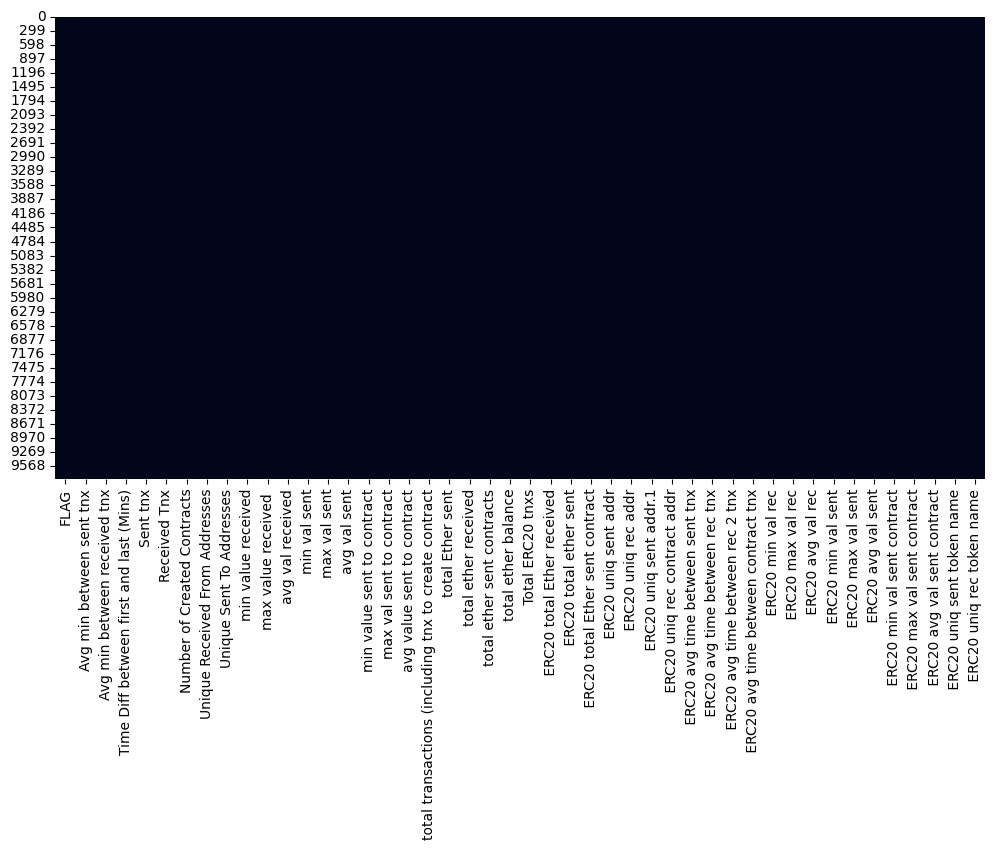

In [ ]:
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

ERC20 avg time between sent tnx        0.0
ERC20 avg time between rec tnx         0.0
ERC20 avg time between rec 2 tnx       0.0
ERC20 avg time between contract tnx    0.0
ERC20 min val sent contract            0.0
ERC20 max val sent contract            0.0
ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

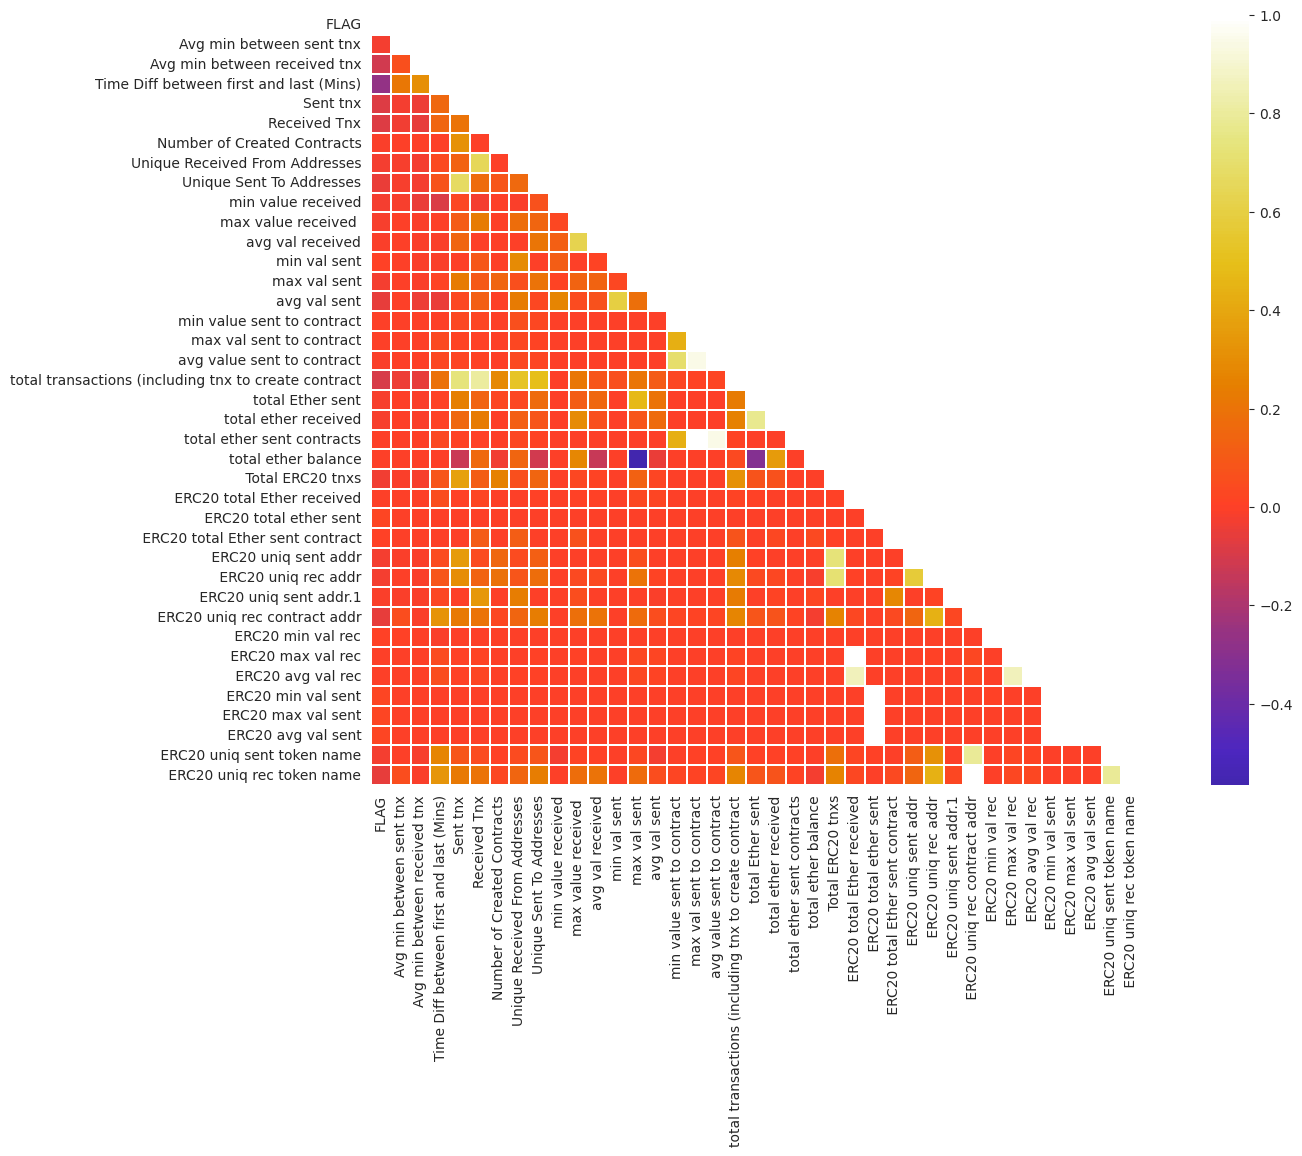

In [ ]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [ ]:
# Separate the target variable (fraud indicator)
target = df['FLAG']

# Separate features (all columns except FLAG)
features = df.drop(columns=['FLAG'])


# Data transformation
1- Standard scaler


2- PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)


In [ ]:
loadings = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(loadings)


      Avg min between sent tnx  Avg min between received tnx  \
PC1                   0.002531                     -0.015004   
PC2                  -0.001469                     -0.002912   
PC3                   0.002007                      0.000764   
PC4                   0.008229                      0.009051   
PC5                   0.063552                      0.063191   
PC6                   0.061876                      0.047403   
PC7                   0.049245                      0.029288   
PC8                  -0.005378                     -0.066826   
PC9                  -0.095611                     -0.152189   
PC10                  0.138580                      0.185632   
PC11                  0.311861                      0.415479   
PC12                  0.307843                      0.416813   
PC13                  0.145392                     -0.072097   
PC14                  0.162261                     -0.045473   
PC15                  0.792920          

In [ ]:
# Combine PCA results with the target variable (FLAG)
final_df = pd.concat([X_pca_df, target.reset_index(drop=True)], axis=1)

# Display the first few rows of the combined dataset
final_df.head()
final_df.iloc[:100]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,FLAG
0,4.439063,0.038652,-0.270561,0.283252,4.274790,2.891859,1.679804,0.544062,-0.468097,0.325673,...,0.642756,-0.392707,0.553000,-0.222915,-0.164083,0.520773,0.217789,-0.551485,0.714633,0
1,0.315613,-0.030141,0.016102,0.148564,0.733672,0.618213,0.214818,-0.303582,-0.867635,0.630979,...,0.154997,0.215096,-0.081803,0.028931,-0.414875,0.262410,1.963411,0.537154,0.661056,0
2,-0.016127,-0.040810,0.013105,0.143983,1.107079,0.941692,0.686842,-0.193191,-1.287267,1.725891,...,1.793575,8.997936,-0.684541,-0.336753,0.579719,-0.353279,-2.170884,-0.576039,-0.359049,0
3,0.141675,-0.023457,-0.030722,0.048922,0.476171,0.316053,0.311067,0.018048,-0.167963,0.232628,...,-0.004895,-0.019389,0.052335,-0.042419,0.000205,0.013939,0.077393,0.131824,-0.044970,0
4,4.047279,0.008927,-0.207616,-0.269121,0.072717,-0.764653,-0.564113,-0.959539,-1.341010,-0.849658,...,1.044059,-0.463407,0.184178,-0.838379,-0.273166,0.580319,0.698215,-0.285798,-0.953822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.632164,-0.022329,-0.010154,-0.044558,-0.154546,-0.301123,-0.103116,-0.082461,0.250651,-0.178087,...,-0.134841,0.069097,0.053161,-0.127612,0.015636,0.001618,-0.177841,-0.054275,0.018038,0
96,-0.299282,-0.023861,-0.053632,-0.067923,-1.011885,-0.357520,0.694389,1.760588,1.188775,-0.455658,...,0.871461,-0.124827,-0.250623,0.669952,0.027349,-0.105720,0.067817,0.383323,-0.871152,0
97,-0.607951,-0.022539,-0.013678,-0.047923,-0.217569,-0.311391,-0.036884,0.060590,0.348973,-0.246840,...,0.035495,0.041508,-0.026504,0.038702,0.028695,-0.042777,-0.153856,-0.050942,0.010692,0
98,-0.123484,-0.023089,-0.020490,0.028010,0.409818,0.200931,0.188606,-0.079115,-0.099124,0.173160,...,0.163765,1.141768,-0.018141,-0.118861,0.033691,-0.003245,-0.150210,-0.042453,0.031874,0


In [ ]:
top_features = loadings.abs().idxmax(axis=1)
print(top_features)
X_pca_df.columns = top_features

PC1     total transactions (including tnx to create co...
PC2                                    ERC20 max val sent
PC3                            avg value sent to contract
PC4                                     ERC20 max val rec
PC5                            ERC20 uniq sent token name
PC6                                   total ether balance
PC7                                      total Ether sent
PC8                                          min val sent
PC9                                   total ether balance
PC10                                 total ether received
PC11                         Avg min between received tnx
PC12                         Avg min between received tnx
PC13                                    ERC20 min val rec
PC14                                   min value received
PC15                             Avg min between sent tnx
PC16                          Number of Created Contracts
PC17                                   min value received
PC18          

In [ ]:
final_df = pd.concat([X_pca_df, target.reset_index(drop=True)], axis=1)

# interoperation
We can see that all the featuers that show the case is a fraud symbolizes how long an account has been open or perhaps how many transactions have been made, and all the fraud cases show either a low transaction count or low value, or even less activity compared to the other accounts.

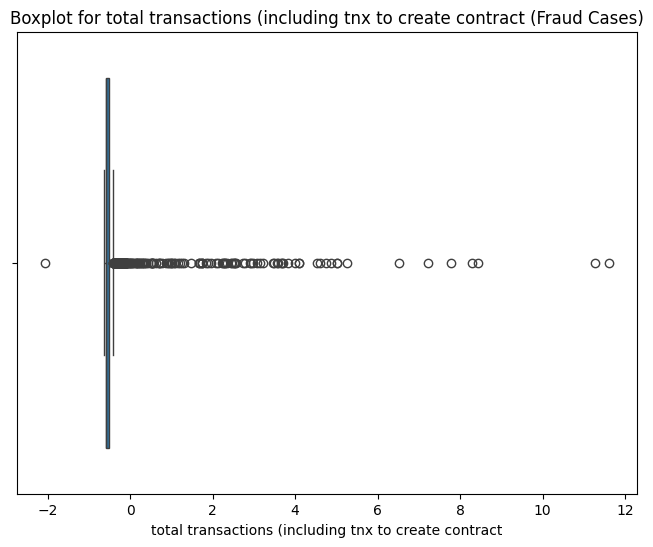

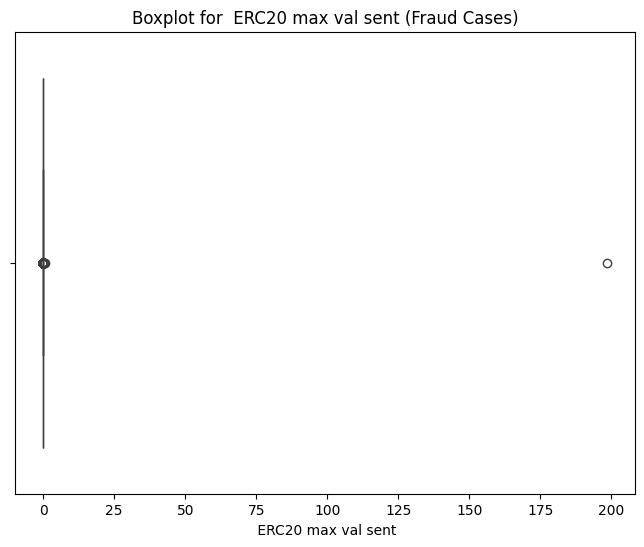

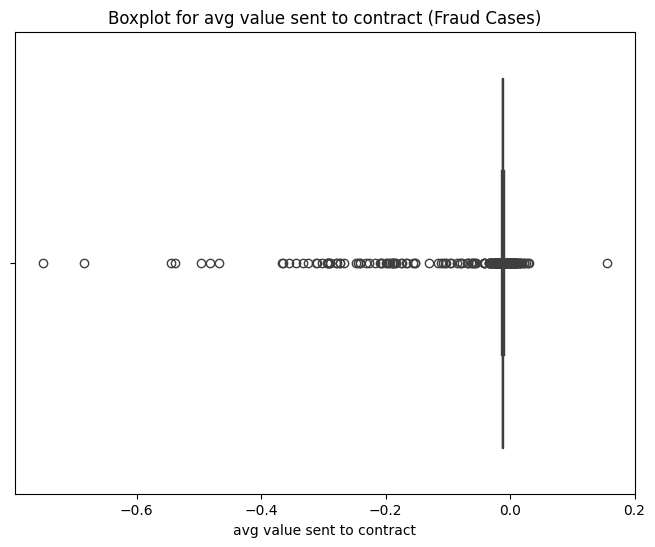

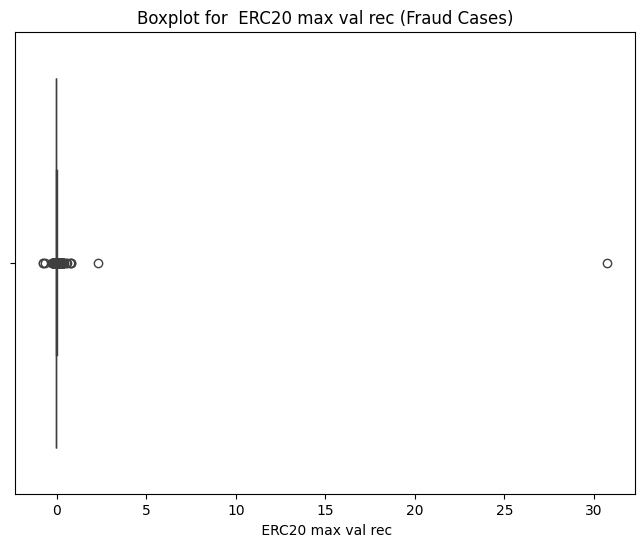

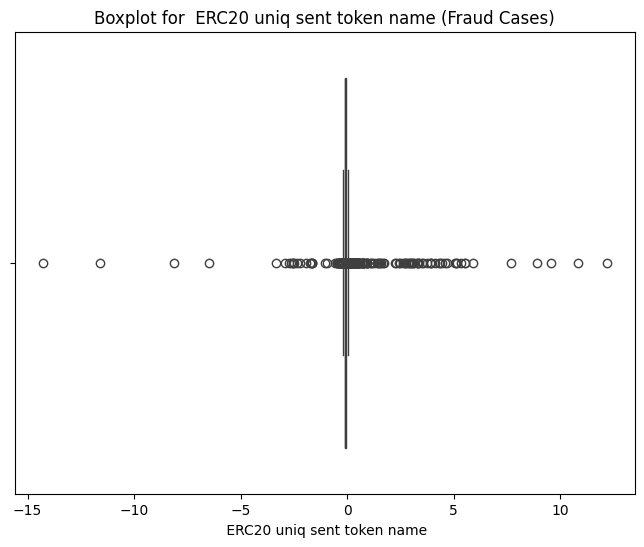

Skipping column total ether balance as it is not numeric or empty.


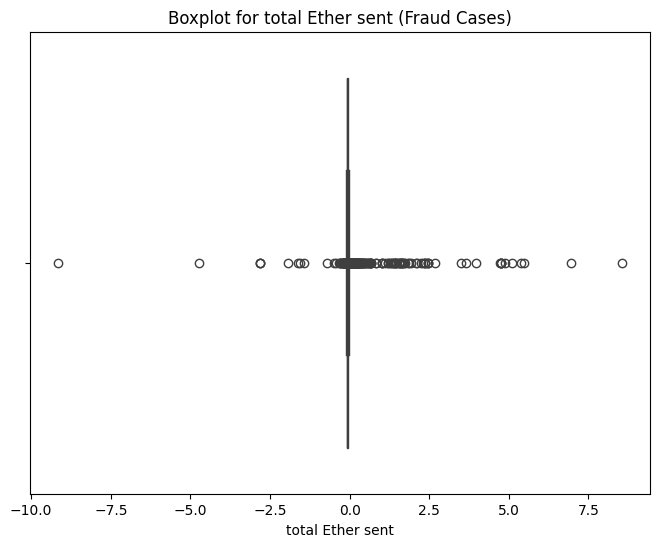

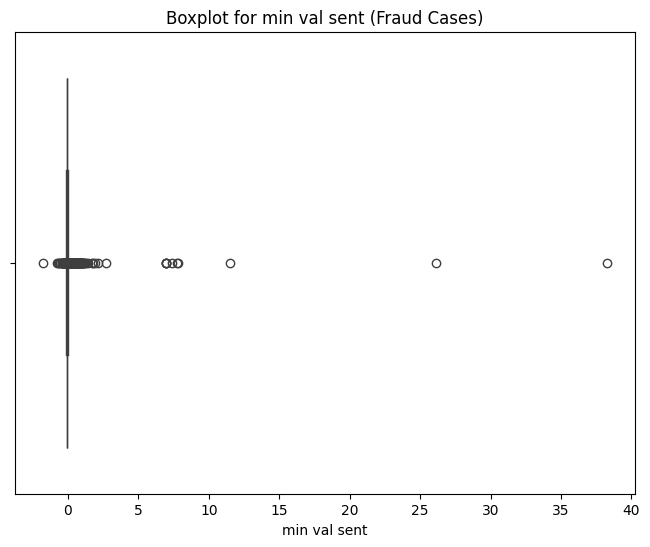

Skipping column total ether balance as it is not numeric or empty.


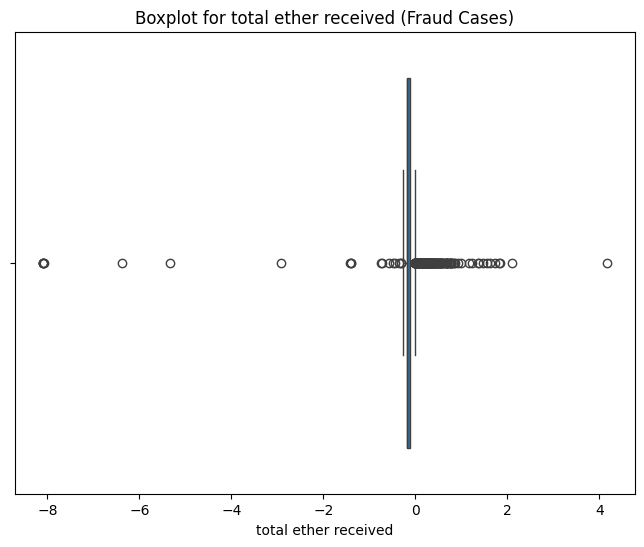

Skipping column Avg min between received tnx as it is not numeric or empty.
Skipping column Avg min between received tnx as it is not numeric or empty.


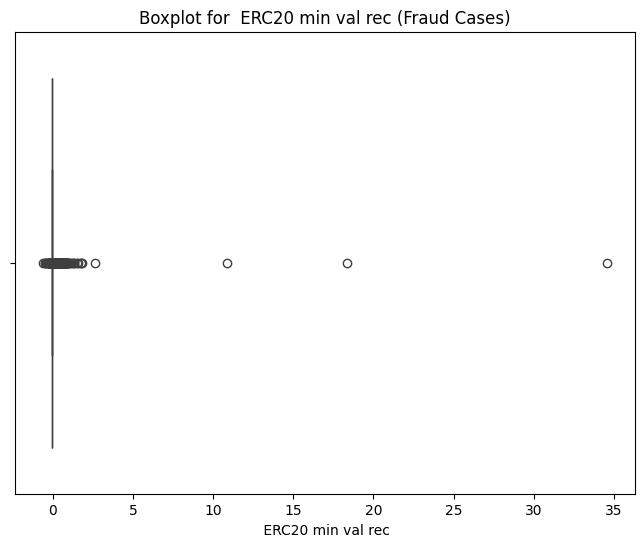

Skipping column min value received as it is not numeric or empty.


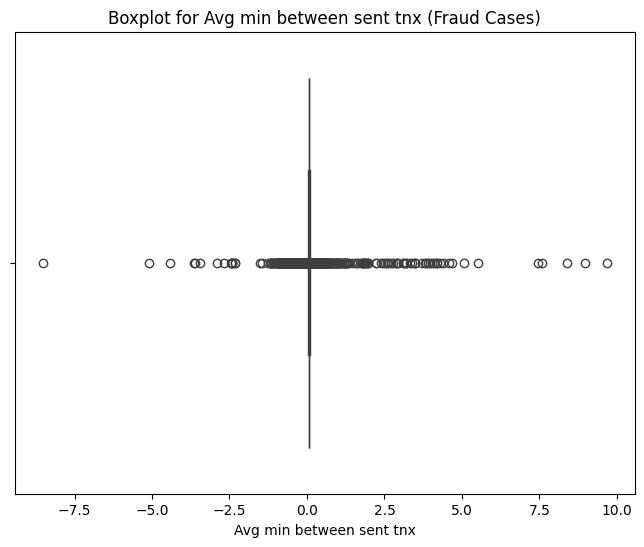

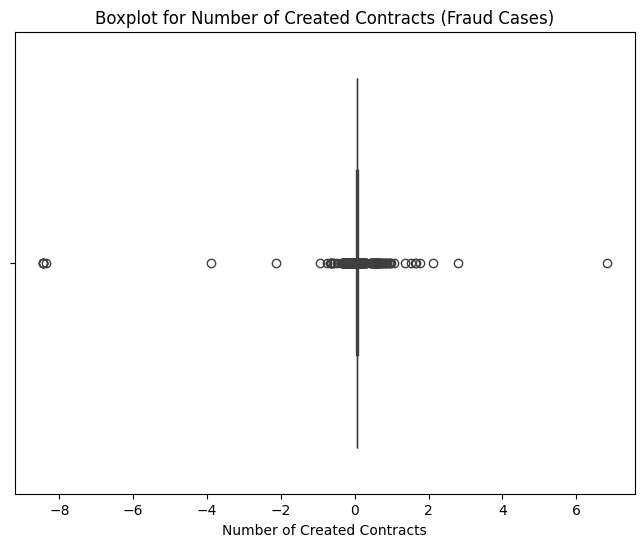

Skipping column min value received as it is not numeric or empty.


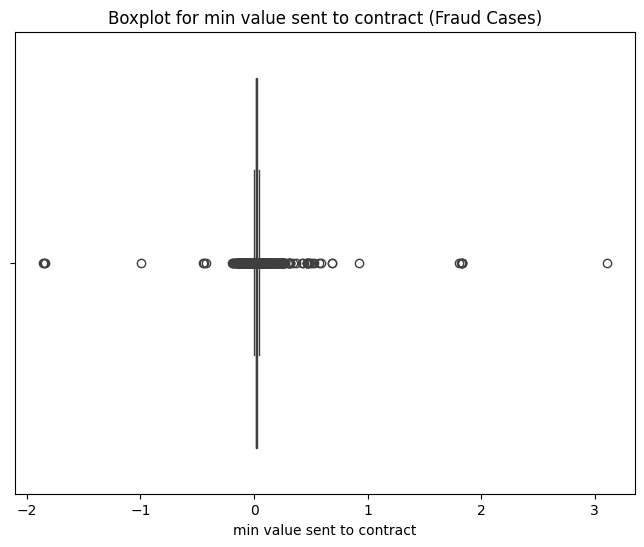

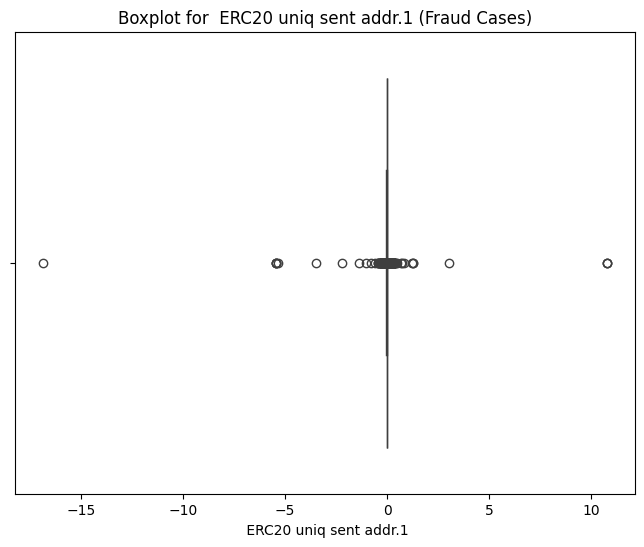

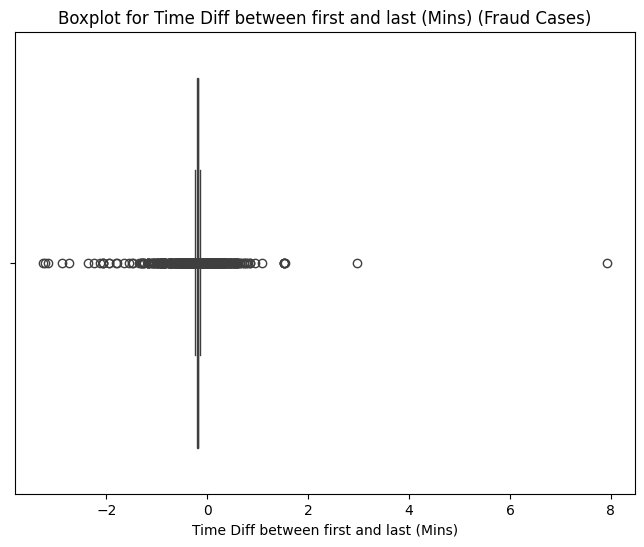

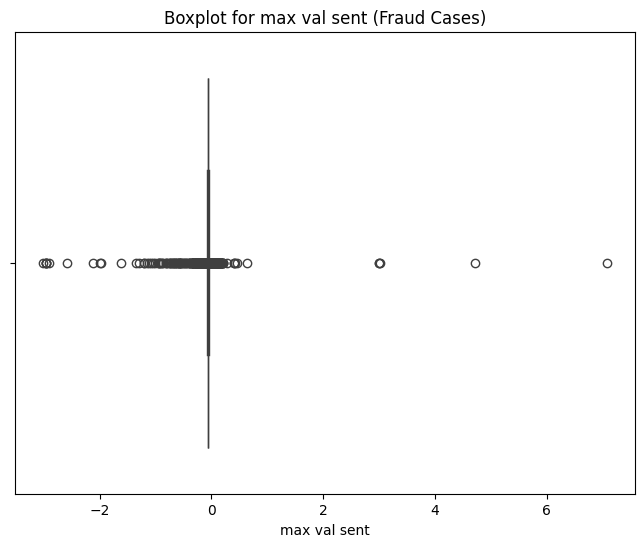

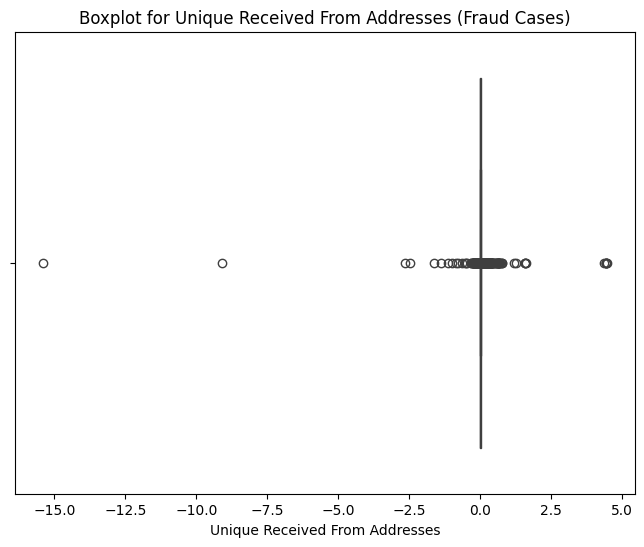

Skipping column FLAG as it is not numeric or empty.


In [ ]:
# Filter the DataFrame for rows where FLAG is 1
fraud_df = final_df[final_df['FLAG'] == 1]

# Iterate over each column except FLAG and plot a boxplot
for column in fraud_df.columns:
    if column != 'FLAG' and pd.api.types.is_numeric_dtype(fraud_df[column]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=fraud_df, x=column)
        plt.title(f'Boxplot for {column} (Fraud Cases)')
        plt.xlabel(column)
        plt.show()
    else:
        print(f"Skipping column {column} as it is not numeric or empty.")


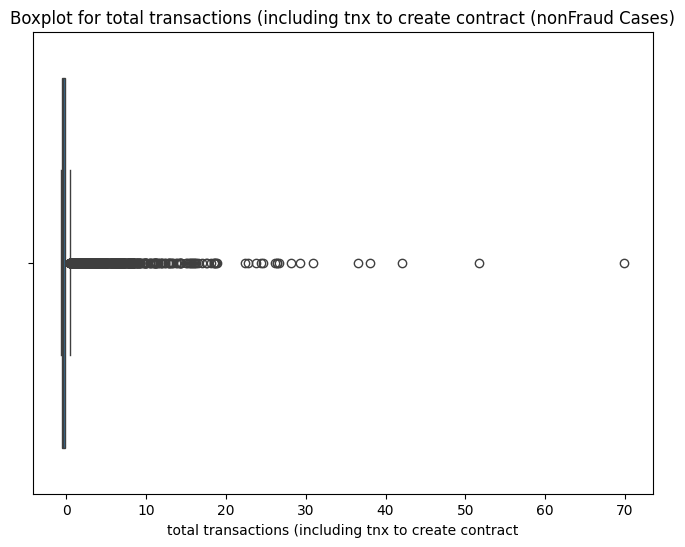

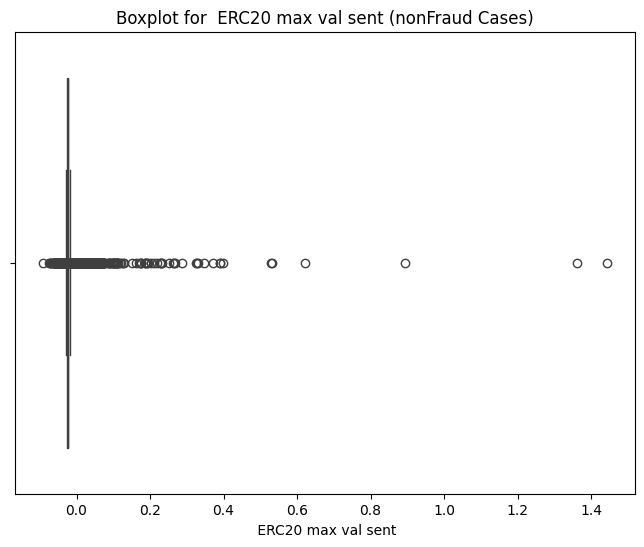

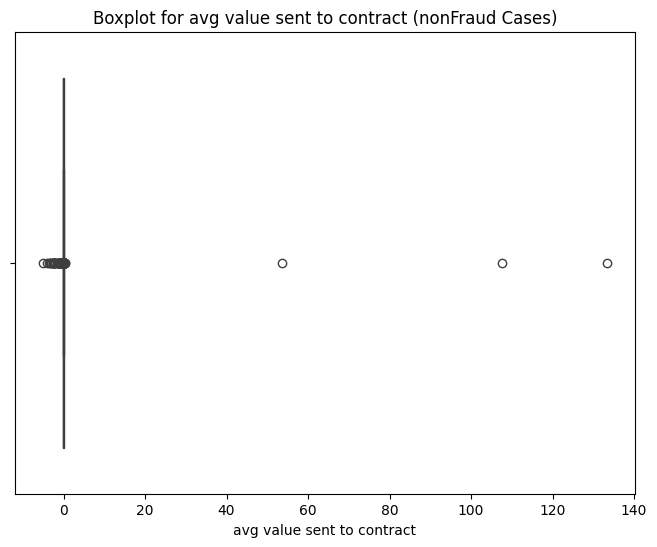

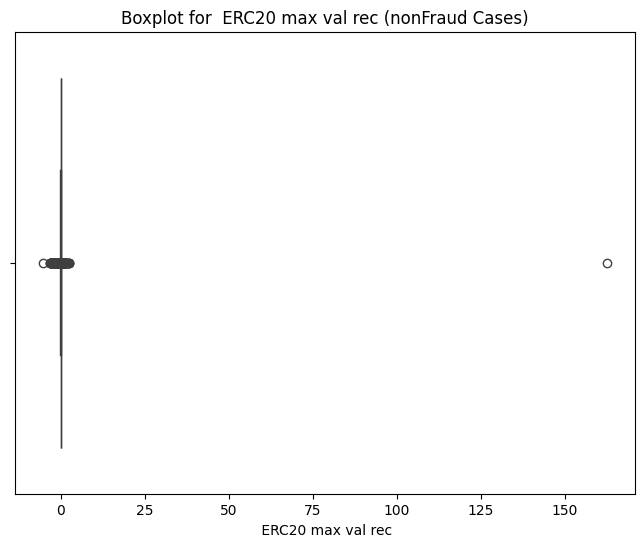

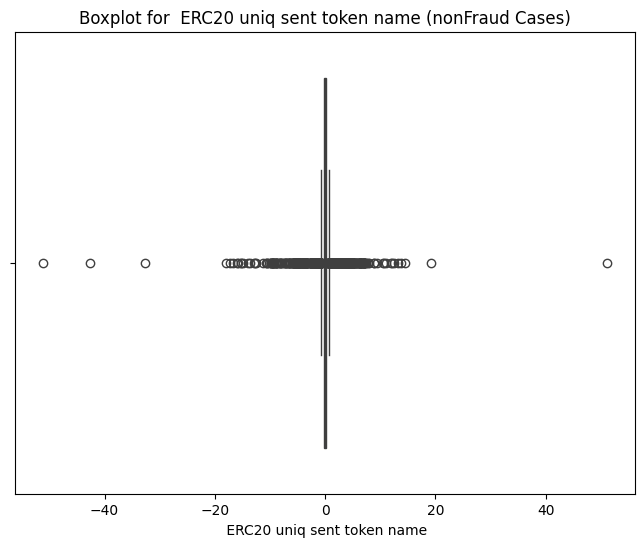

Skipping column total ether balance as it is not numeric or empty.


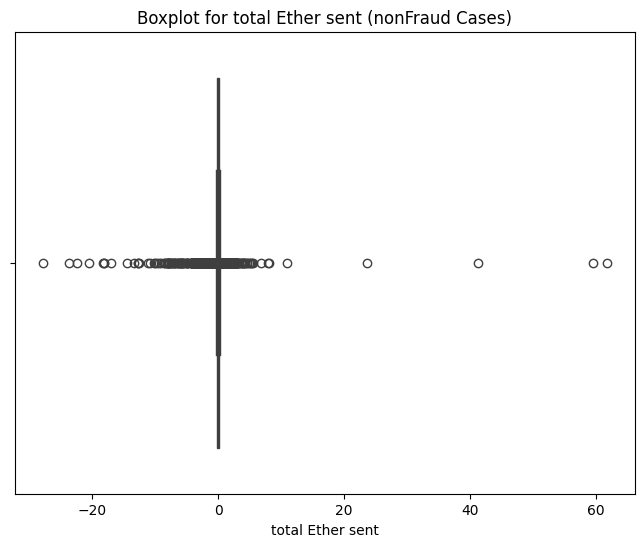

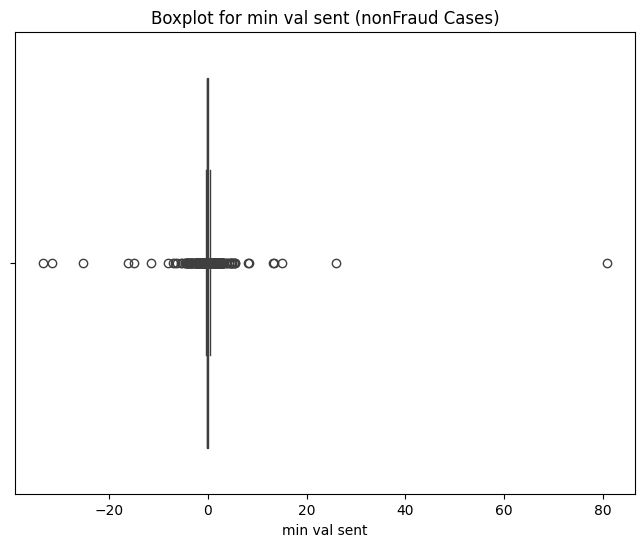

Skipping column total ether balance as it is not numeric or empty.


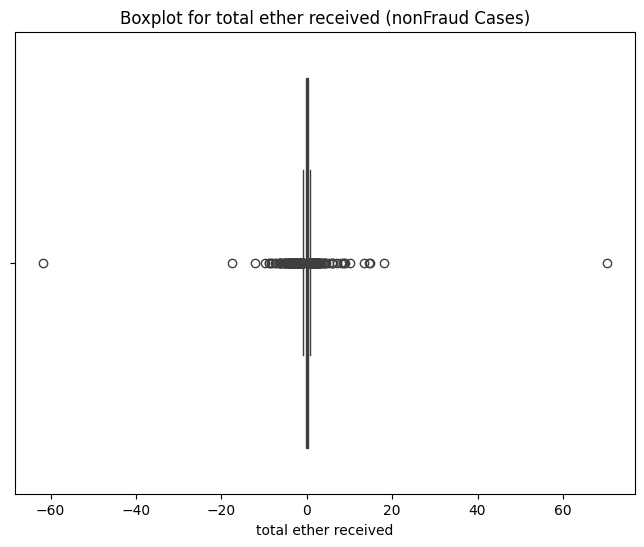

Skipping column Avg min between received tnx as it is not numeric or empty.
Skipping column Avg min between received tnx as it is not numeric or empty.


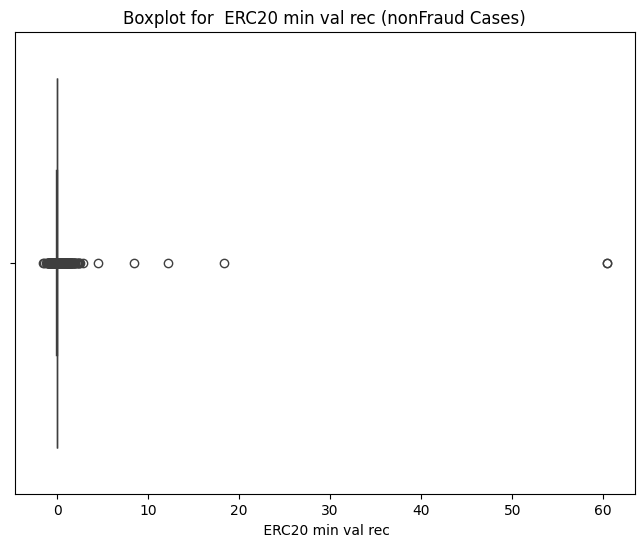

Skipping column min value received as it is not numeric or empty.


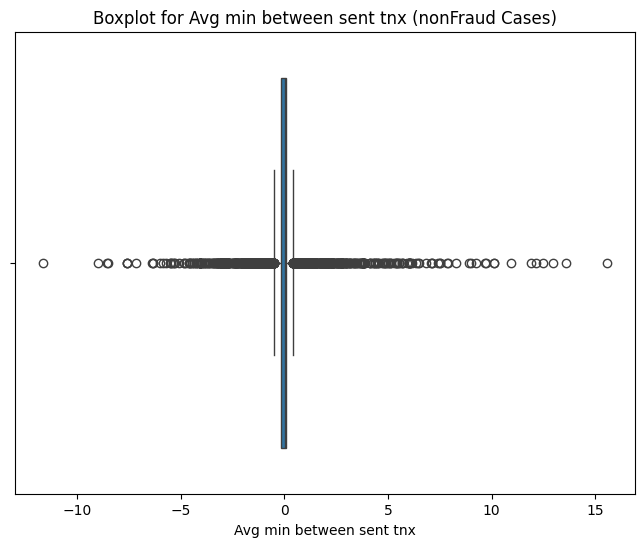

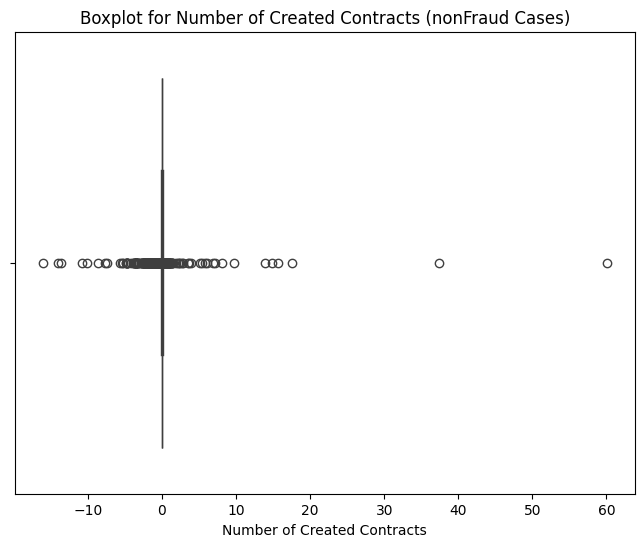

Skipping column min value received as it is not numeric or empty.


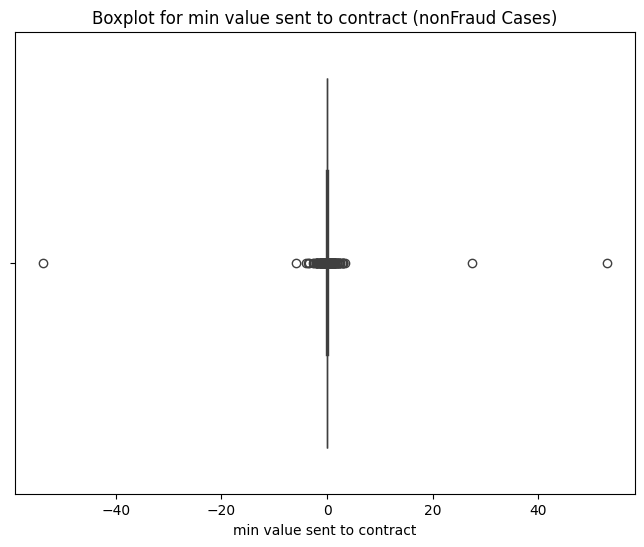

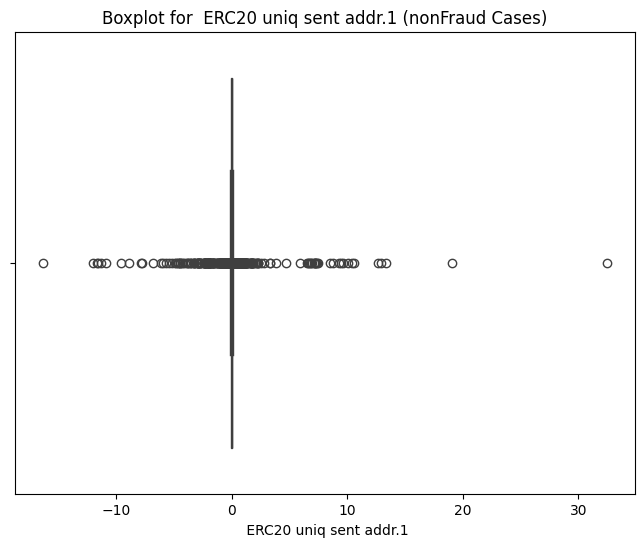

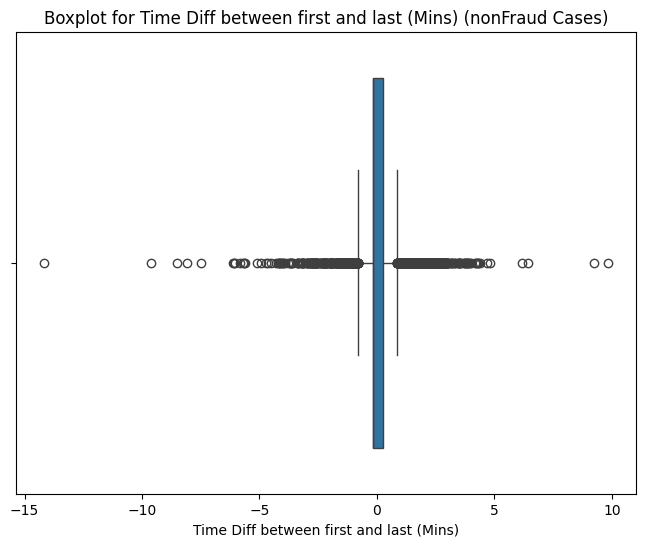

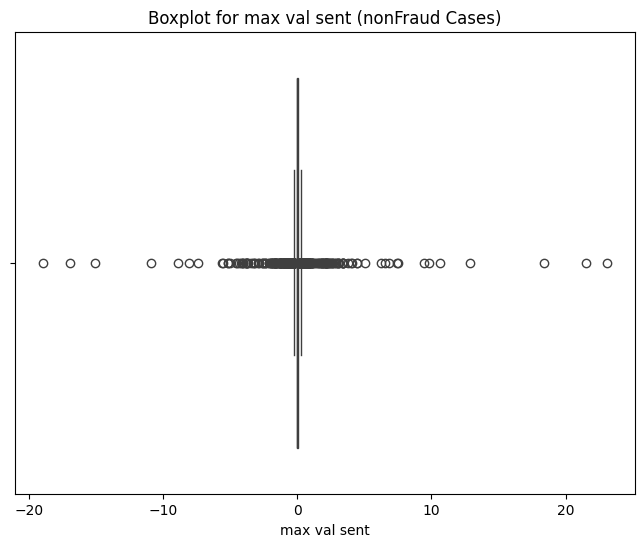

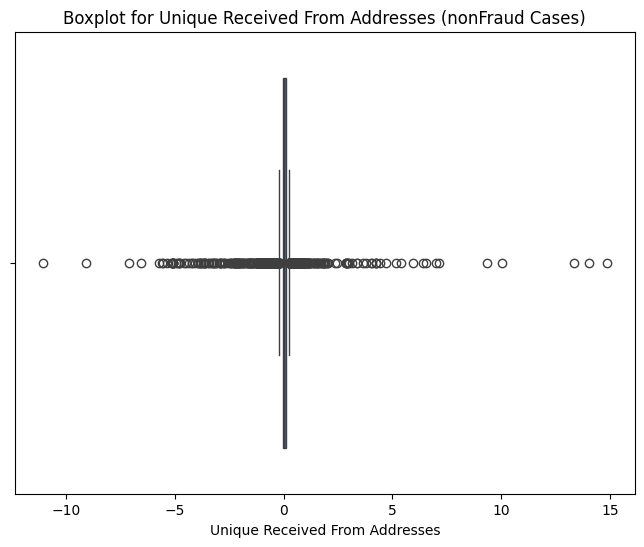

Skipping column FLAG as it is not numeric or empty.


In [ ]:

# Filter the DataFrame for rows where FLAG is 0
nonfraud_df = final_df[final_df['FLAG'] == 0]

# Iterate over each column except FLAG and plot a boxplot
for column in nonfraud_df.columns:
    if column != 'FLAG' and pd.api.types.is_numeric_dtype(nonfraud_df[column]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=nonfraud_df, x=column)
        plt.title(f'Boxplot for {column} (nonFraud Cases)')
        plt.xlabel(column)
        plt.show()
    else:
        print(f"Skipping column {column} as it is not numeric or empty.")


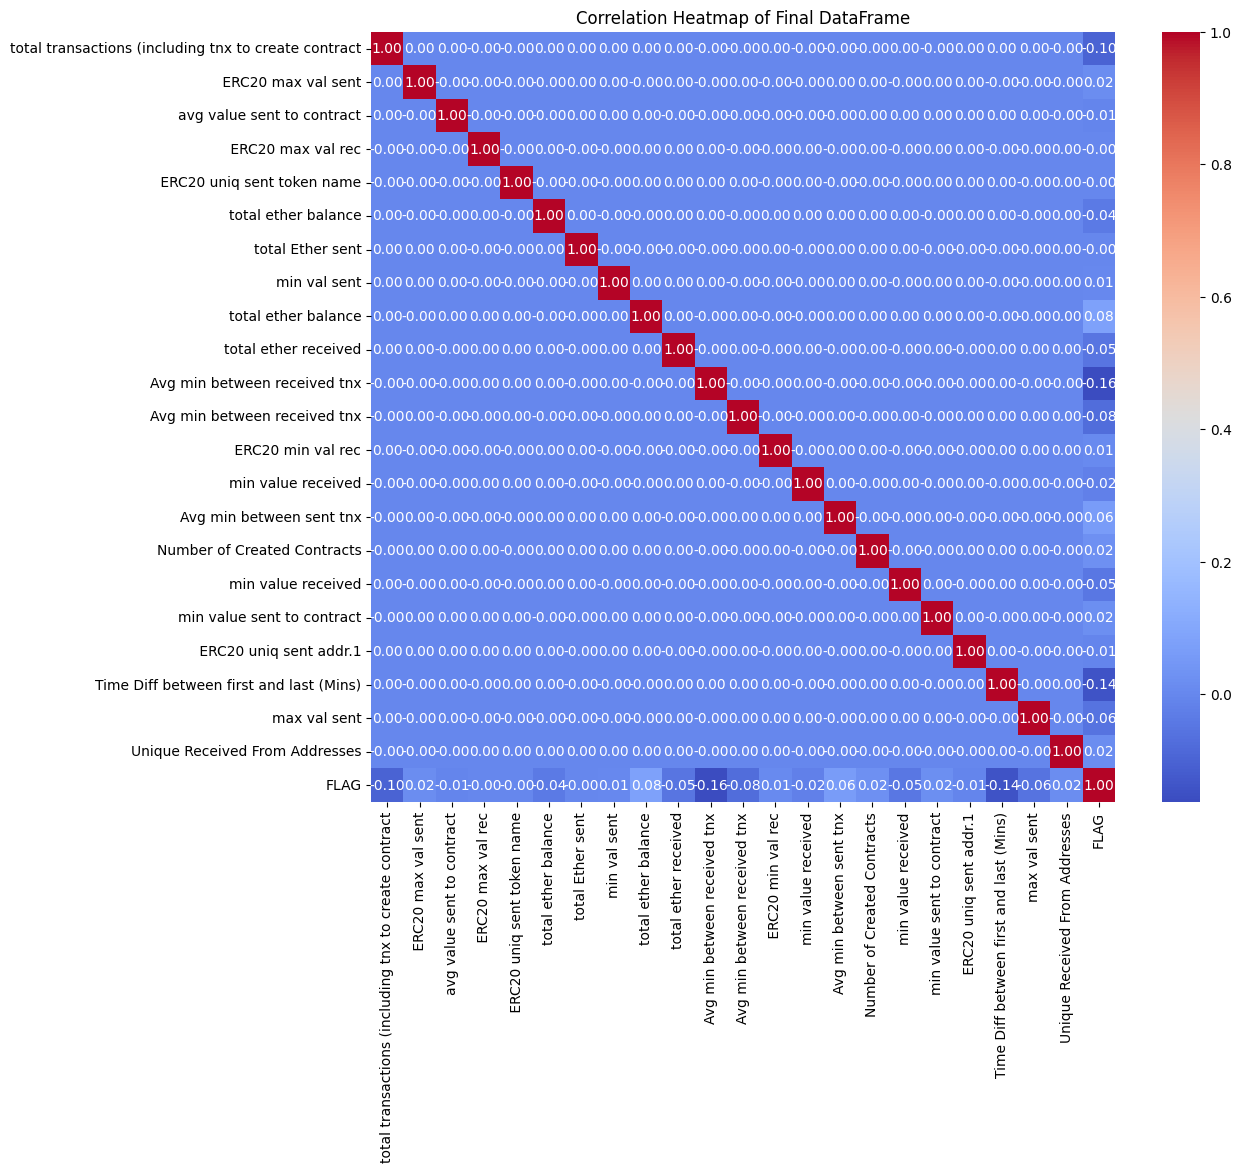

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Final DataFrame')
plt.show()

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   total transactions (including tnx to create contract  9841 non-null   float64
 1    ERC20 max val sent                                   9841 non-null   float64
 2   avg value sent to contract                            9841 non-null   float64
 3    ERC20 max val rec                                    9841 non-null   float64
 4    ERC20 uniq sent token name                           9841 non-null   float64
 5   total ether balance                                   9841 non-null   float64
 6   total Ether sent                                      9841 non-null   float64
 7   min val sent                                          9841 non-null   float64
 8   total ether balance                                   9841

# Interpretation Of the final transformed DF
After feature selection based on the PCA algorithm and transforming the data setusing the standard scaler we are left with a more concise data set that still contains the analytical power we need.

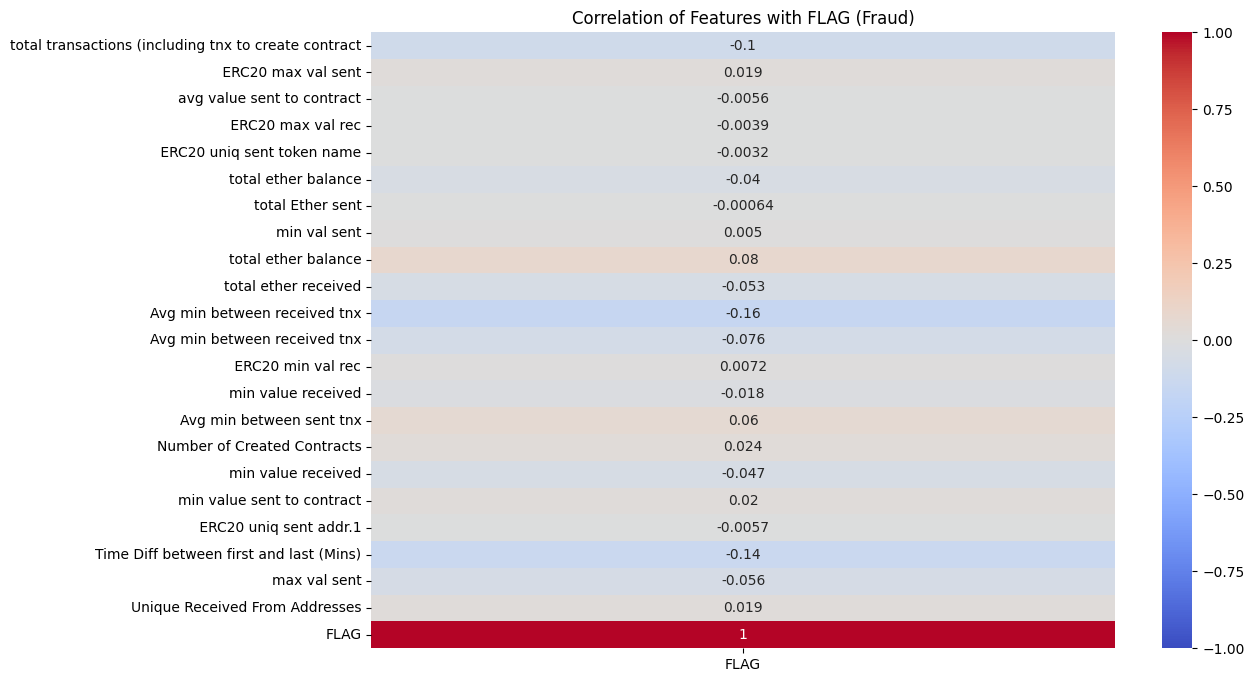

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Plot the correlation with the target variable (FLAG)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['FLAG']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with FLAG (Fraud)')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the data
X = final_df.drop(columns=['FLAG'])
y = final_df['FLAG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to view feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Calculate accuracy directly using the model's score method
test_accuracy = rf.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9567


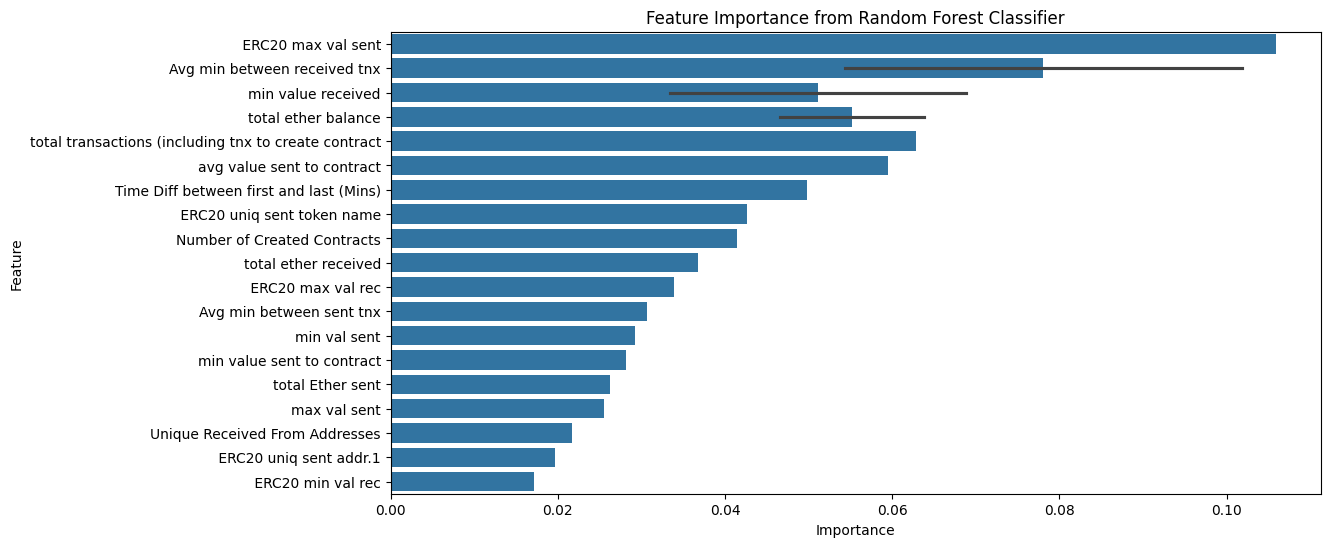

                                              Feature  Importance
1                                  ERC20 max val sent    0.105958
10                       Avg min between received tnx    0.101885
16                                 min value received    0.068808
5                                 total ether balance    0.063821
0   total transactions (including tnx to create co...    0.062892
2                          avg value sent to contract    0.059538
11                       Avg min between received tnx    0.054301
19            Time Diff between first and last (Mins)    0.049780
8                                 total ether balance    0.046570
4                          ERC20 uniq sent token name    0.042633


In [ ]:
# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

# Print out the top features
print(feature_importance.head(10))

# Evaluation metrics
1. Feature Importance Analysis
The table shows the top 10 most important features for predicting the target variable (FLAG) based on the Random Forest model. Here’s what the key features suggest:

ERC20 max val sent (Importance: ~10.6%):
The maximum value sent via ERC20 tokens is the most critical feature. High values here might indicate large transactions that could be flagged as suspicious (e.g., potential scams, money laundering, or high-risk transfers).

Avg min between received tnx (Importance: ~10.2%):
The average time between incoming transactions is highly influential. Shorter intervals might suggest automated or bot-like behavior (e.g., rapid transfers in fraudulent schemes).

min value received (Importance: ~6.9%):
The smallest value received could highlight patterns of micro-transactions, which are common in certain fraud scenarios (e.g., testing stolen accounts).

total ether balance (Importance: ~6.4%):
Total Ether balance reflects the overall liquidity of an address. Unusually high or low balances might correlate with risky behavior.

ERC20 uniq sent token name (Importance: ~4.3%):
The diversity of ERC20 tokens sent could indicate complex transaction patterns (e.g., mixing tokens to obfuscate funds).

Why This Matters:
These features suggest the model prioritizes transaction values, temporal patterns, and token diversity to detect anomalies. This aligns with known blockchain fraud patterns (e.g., rapid micro-transactions, large withdrawals).

2. Model Performance
The Test Accuracy: 95.67% indicates that the model correctly predicted the class (FLAG) for 95.67% of the test data.


Key Takeaways
Top Features: Transaction size (ERC20 max val sent) and timing (Avg min between received tnx) are the strongest predictors of flagged behavior.

Model Reliability: The 95.67% accuracy implies high predictive power, but further validation with metrics like AUC-ROC or F1-score is recommended.

Actionable Insight: Investigate addresses with large ERC20 transfers or rapid transaction intervals, as these are flagged as high-risk by the model.

In [ ]:
final_df

,total transactions (including tnx to create contract,ERC20 max val sent,avg value sent to contract,ERC20 max val rec,ERC20 uniq sent token name,total ether balance,total Ether sent,min val sent,total ether balance,total ether received,...,min value received,Avg min between sent tnx,Number of Created Contracts,min value received,min value sent to contract,ERC20 uniq sent addr.1,Time Diff between first and last (Mins),max val sent,Unique Received From Addresses,FLAG
0,4.439063,0.038652,-0.270561,0.283252,4.274790,2.891859,1.679804,0.544062,-0.468097,0.325673,...,0.642756,-0.392707,0.553000,-0.222915,-0.164083,0.520773,0.217789,-0.551485,0.714633,0
1,0.315613,-0.030141,0.016102,0.148564,0.733672,0.618213,0.214818,-0.303582,-0.867635,0.630979,...,0.154997,0.215096,-0.081803,0.028931,-0.414875,0.262410,1.963411,0.537154,0.661056,0
2,-0.016127,-0.040810,0.013105,0.143983,1.107079,0.941692,0.686842,-0.193191,-1.287267,1.725891,...,1.793575,8.997936,-0.684541,-0.336753,0.579719,-0.353279,-2.170884,-0.576039,-0.359049,0
3,0.141675,-0.023457,-0.030722,0.048922,0.476171,0.316053,0.311067,0.018048,-0.167963,0.232628,...,-0.004895,-0.019389,0.052335,-0.042419,0.000205,0.013939,0.077393,0.131824,-0.044970,0
4,4.047279,0.008927,-0.207616,-0.269121,0.072717,-0.764653,-0.564113,-0.959539,-1.341010,-0.849658,...,1.044059,-0.463407,0.184178,-0.838379,-0.273166,0.580319,0.698215,-0.285798,-0.953822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,-0.495860,-0.022919,-0.012003,-0.028165,-0.037780,-0.164110,-0.029211,-0.064375,0.140401,-0.061746,...,-0.036330,0.510339,0.017527,-0.132915,0.040840,-0.020488,-0.246526,-0.065006,-0.008636,1
9837,-0.590818,-0.021986,-0.012690,-0.041551,-0.112393,-0.272099,-0.081774,-0.080123,0.252033,-0.178459,...,-0.133262,0.069689,0.058718,-0.124651,0.018704,-0.000694,-0.186733,-0.053183,0.004884,1
9838,-0.171840,-0.022190,-0.014810,-0.007719,0.087361,-0.014198,-0.003305,-0.127898,-0.047925,-0.057984,...,-0.067486,0.055905,-0.001466,-0.123309,-0.050925,0.022986,0.171659,0.073524,0.133613,1
9839,-0.589611,-0.021980,-0.012658,-0.041717,-0.114010,-0.271082,-0.082583,-0.079240,0.251703,-0.178981,...,-0.133431,0.069911,0.058098,-0.123423,0.019104,-0.001934,-0.187033,-0.054465,0.006125,1


Number of Trees: 10
  Train Accuracy: 0.9962
  Test Accuracy: 0.9573
  CV Mean Accuracy: 0.9559

Number of Trees: 20
  Train Accuracy: 0.9988
  Test Accuracy: 0.9583
  CV Mean Accuracy: 0.9559

Number of Trees: 30
  Train Accuracy: 0.9991
  Test Accuracy: 0.9583
  CV Mean Accuracy: 0.9572

Number of Trees: 40
  Train Accuracy: 0.9996
  Test Accuracy: 0.9567
  CV Mean Accuracy: 0.9596

Number of Trees: 50
  Train Accuracy: 0.9996
  Test Accuracy: 0.9570
  CV Mean Accuracy: 0.9593



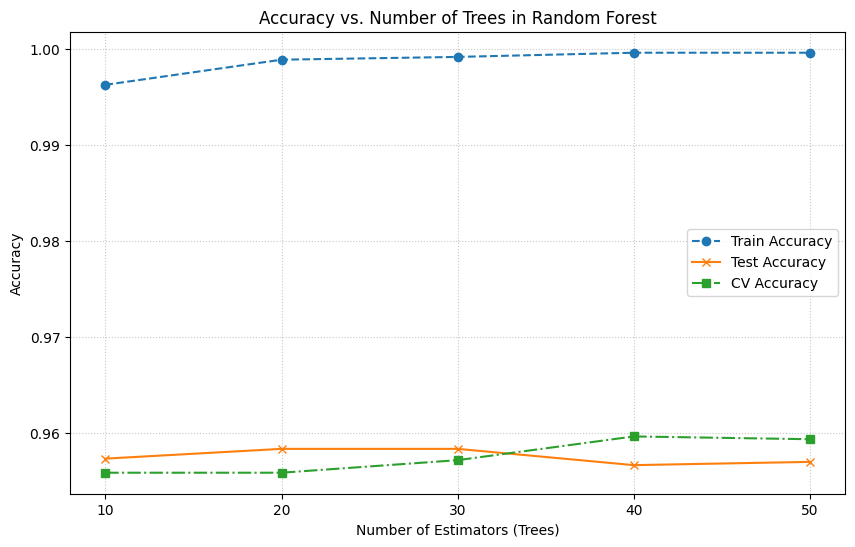

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Initialize the model with `warm_start=True`
rf_model = RandomForestClassifier(warm_start=True, random_state=42)

n_estimators_range = np.arange(10, 60, 10)
train_accuracies = []
test_accuracies = []
cv_scores_mean = []

for n_estimators in n_estimators_range:
    rf_model.n_estimators = n_estimators
    rf_model.fit(X_train, y_train)

    # Predictions
    train_pred = rf_model.predict(X_train)
    test_pred = rf_model.predict(X_test)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = np.mean(cv_scores)

    # Append to lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    cv_scores_mean.append(cv_mean)

    # Print results for each n_estimators
    print(f"Number of Trees: {n_estimators}")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print(f"  CV Mean Accuracy: {cv_mean:.4f}\n")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Train Accuracy', marker='o', linestyle='--')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='x', linestyle='-')
plt.plot(n_estimators_range, cv_scores_mean, label='CV Accuracy', marker='s', linestyle='-.')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Trees in Random Forest')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(n_estimators_range)
plt.show()

### **Experiment Description & Hyperparameter Tuning Analysis**

---

#### **1. Objective of the Experiment**  
The goal was to **optimize the Random Forest model’s performance** by tuning the hyperparameter `n_estimators` (number of decision trees in the forest). By incrementally increasing the number of trees, we aimed to:  
- Identify the point where adding more trees no longer improves generalization (test/CV accuracy).  
- Balance **model complexity** (avoid overfitting) and **performance** (maximize accuracy).  

---

#### **2. Hyperparameter Manipulation**  
- **Key Hyperparameter**: `n_estimators` (tested values: 10, 20, 30, 40, 50).  
- **Methodology**:  
  - Used `warm_start=True` to incrementally add trees without reinitializing the model.  
  - Tracked **training accuracy**, **test accuracy**, and **5-fold cross-validation (CV) accuracy** for each tree count.  

---

#### **3. Observations from the Experiment**  
| Trees | Train Accuracy | Test Accuracy | CV Mean Accuracy |  
|-------|----------------|---------------|------------------|  
| 10    | 0.9962         | **0.9573**    | 0.9559           |  
| 20    | 0.9988         | **0.9583**    | 0.9559           |  
| 30    | 0.9991         | **0.9583**    | 0.9572           |  
| 40    | 0.9996         | 0.9567        | 0.9596           |  
| 50    | 0.9996         | 0.9570        | 0.9593           |  

- **Train Accuracy**:  
  - Increased steadily (0.9962 → 0.9996) as more trees were added, indicating **overfitting** (model memorizes training data).  
- **Test Accuracy**:  
  - Peaked at **20 trees (0.9583)** and slightly declined afterward.  
  - Adding trees beyond 20 provided no improvement, suggesting **diminishing returns**.  
- **CV Mean Accuracy**:  
  - Remained stable (0.9559–0.9596), confirming robustness across different data splits.  

---

#### **4. Comparison to the First Model**  
The **initial Random Forest model** used:  
- **Fixed hyperparameters**: `n_estimators=100`, no cross-validation.  
- **Result**: Test Accuracy = **0.9567**.  

**Key Differences**:  
1. **Hyperparameter Optimization**:  
   - The first model used a default of 100 trees, while the second experiment tested smaller values (10–50 trees).  
   - **Finding**: Even with fewer trees (20), the optimized model achieved **higher test accuracy (0.9583)** than the first model (0.9567).  
2. **Overfitting Mitigation**:  
   - The first model (100 trees) likely overfits more, as training accuracy in the second experiment approached 100% with just 50 trees.  
3. **Validation Strategy**:  
   - The first model used a single train-test split, while the second experiment used **cross-validation** to reduce variance in performance estimates.  

---

#### **5. Insights & Recommendations**  
- **Optimal Tree Count**:  
  - **20 trees** provided the best test accuracy (0.9583). Adding more trees increased training accuracy but degraded test performance.  
- **Trade-Off**:  
  - Higher tree counts (e.g., 50) marginally improved CV accuracy but risked overfitting (declining test accuracy).  
- **Why the First Model Underperformed**:  
  - Using 100 trees likely introduced unnecessary complexity, leading to overfitting despite similar test accuracy (0.9567).  

---

### **Conclusion**  
By systematically tuning `n_estimators`, we identified that **20 trees** achieved the best balance of performance and generalization. This approach outperformed the first model’s default settings, demonstrating the importance of hyperparameter optimization

Test Accuracy: 0.9583


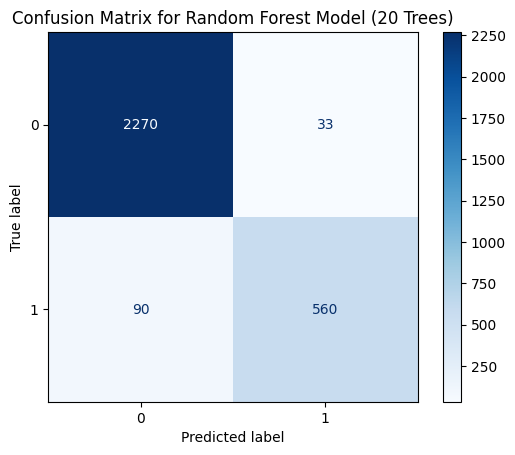

Precision: 0.9444
Recall: 0.8615
F1-Score: 0.9010


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Use the best model (20 trees) for predictions
best_model = RandomForestClassifier(n_estimators=20, random_state=42)
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')  # Use 'd' for integer formatting
plt.title('Confusion Matrix for Random Forest Model (20 Trees)')
plt.show()

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Model Performance Summary
The Random Forest model (20 Trees) demonstrates strong performance on the test dataset, achieving a test accuracy of 95.83%. The confusion matrix indicates that the model correctly classified 2,270 negative samples (true negatives) and 560 positive samples (true positives), while misclassifying 33 negative samples as positive (false positives) and 90 positive samples as negative (false negatives).

Key performance metrics:

Precision: 94.44% – The proportion of predicted positive cases that are actually positive.
Recall: 86.15% – The model's ability to detect actual positive cases.
F1-Score: 90.10% – A balance between precision and recall.
Overall, the model exhibits high precision and a strong F1-score, indicating reliable classification performance, though there is some room for improvement in recall to reduce false negatives.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7693 - loss: 0.5555 - val_accuracy: 0.7881 - val_loss: 0.4384
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7807 - loss: 0.4327 - val_accuracy: 0.7845 - val_loss: 0.3996
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7850 - loss: 0.3896 - val_accuracy: 0.7983 - val_loss: 0.3668
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8292 - loss: 0.3657 - val_accuracy: 0.8766 - val_loss: 0.3369
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8668 - loss: 0.3388 - val_accuracy: 0.9216 - val_loss: 0.3114
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8931 - loss: 0.3223 - val_accuracy: 0.9194 - val_loss: 0.2937
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9095 - loss: 0.2886 - val_accuracy: 0.9253 - val_loss: 0.2730
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9227 - loss: 0.2830 - val_accuracy: 0.

In [ ]:
yHat= model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 94.87%


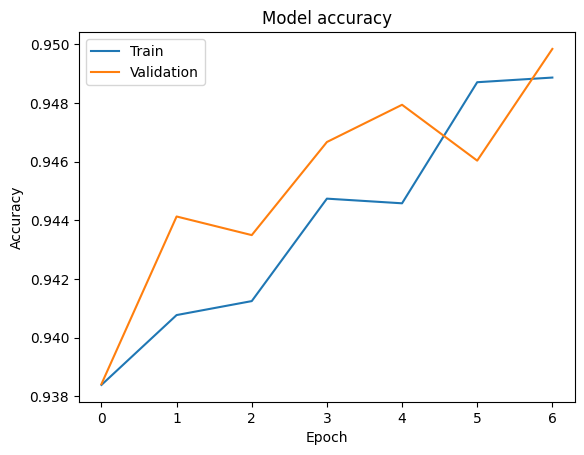

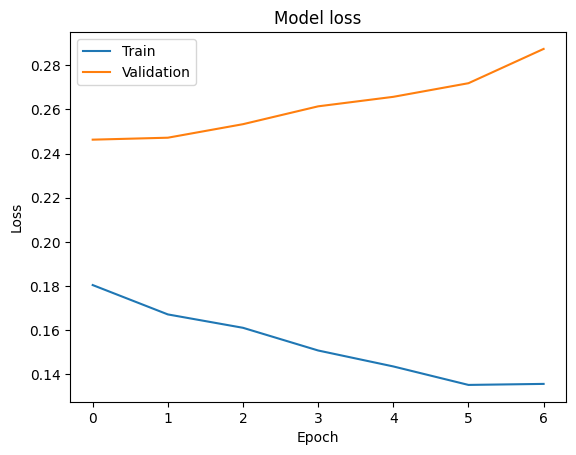

In [ ]:
# prompt: can you plot the accuracy of the deep learning model

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
# Assuming the model training is already done and the model is saved in the `model` variable

# Retrain and get history for plotting
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2, verbose=0)
yHat = model.predict(X_test)
y_pred_dl = (yHat > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_dl)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from collections import Counter
from itertools import combinations
import pandas as pd
df = pd.read_csv('drive/MyDrive/DataMining/transaction_dataset.csv')
# Clean column names
df.columns = df.columns.str.strip()

# Extract relevant data
contract_interactions = df[['Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type']].dropna()

# Group by Address and collect contracts they interacted with
address_contracts = contract_interactions.groupby('Address').agg(lambda x: list(set(x.dropna())))

# Flatten nested lists properly
contract_sets = [
    [contract for sublist in contract_list for contract in (sublist if isinstance(sublist, list) else [sublist])]
    for contract_list in address_contracts.values.tolist()
]

# Count individual contract occurrences
contract_counts = Counter([contract for sublist in contract_sets for contract in sublist])

# Count co-occurrences (pairwise interactions)
pair_counts = Counter()
for contract_list in contract_sets:
    for pair in combinations(contract_list, 2):
        pair_counts[pair] += 1

# Convert to DataFrame for visualization
contract_df = pd.DataFrame(pair_counts.items(), columns=['Contract Pair', 'Frequency'])
contract_df = contract_df.sort_values(by='Frequency', ascending=False)

# Display the DataFrame in Jupyter Notebook or Colab
from IPython.display import display
display(contract_df)

# Save to CSV (if needed)
contract_df.to_csv("frequent_smart_contract_interactions.csv", index=False)


,Contract Pair,Frequency
4,"(0, 0)",4388
8,"( , Blockwell say NOTSAFU)",767
60,"(Golem, Golem)",94
59,"(EOS, EOS)",93
66,"(OmiseGO, OmiseGO)",80
...,...,...
372,"(StatusNetwork, VectoraicToken)",1
373,"(XENON, Tronix)",1
374,"(AdEx, OmiseGO)",1
375,"(VeChain, Livepeer Token)",1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

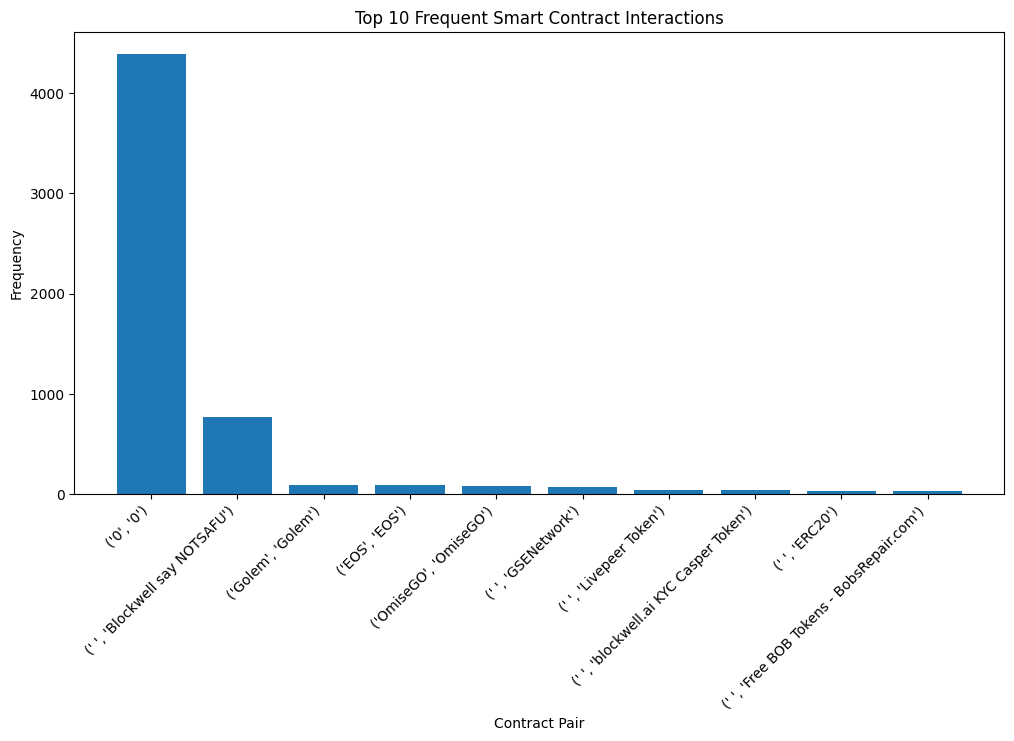

In [ ]:
import matplotlib.pyplot as plt

# Select top 10 frequent contract pairs
top_10_contracts = contract_df.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_contracts['Contract Pair'].astype(str), top_10_contracts['Frequency'])
plt.xlabel('Contract Pair')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Frequent Smart Contract Interactions')
plt.show()


### **Analysis Summary**  
The bar chart presents the **top 10 most frequent smart contract interactions**, with each pair representing contracts that frequently appeared together. The y-axis indicates interaction frequency.

### **Key Insights:**  
- The highest-frequency pairs suggest dominant contract interactions, likely involving **popular DeFi protocols, automated transactions, or recurrent user behaviors**.  
- A gradual decline in frequency indicates a concentration of activity around specific contracts.  
- High-frequency interactions may signal **high-utility contracts, arbitrage trading, or potential bot activity**.